In [1]:
# Dependencies
%matplotlib notebook

import xml.etree.ElementTree as ET
import numpy as np
import glob
import cv2
import sys
import time

import colony_iomethods as cm
import pandas as pd

from matplotlib import pyplot as plt

In [2]:
# Folder for the files
exp_name = "EQ59_Gly_02022021"
acq_name_data = [["EQ59_Gly_02022021_TileScan_Tp1-5", "xyzt"],
               ["EQ59_Gly_02022021_TileScan_Tp6-7", "xyzt"],
               ["EQ59_Gly_02022021_TileScan_Tp8", "xyz"],
               ["EQ59_Gly_02022021_TileScan_Tp9", "xyz"],
               ["EQ59_Gly_02022021_TileScan_Tp10", "xyz"],
               ["EQ59_Gly_02022021_TileScan_Tp11-24", "xyzt"],
               ["EQ59_Gly_02022021_TileScan_Tp25", "xyz"],
               ["EQ59_Gly_02022021_TileScan_Tp26", "xyz"],
               ["EQ59_Gly_02022021_TileScan_Tp27", "xyz"],
               ["EQ59_Gly_02022021_TileScan_Tp28", "xyz"],
               ["EQ59_Gly_02022021_TileScan_Tp29", "xyz"],
               ["EQ59_Gly_02022021_TileScan_Tp30-38", "xyzt"],
               ["EQ59_Gly_02022021_TileScan_Tp39", "xyz"]]#,
#               ["EQ59_Gly_02022021_TileScan_Tp40", "xyz"],
#               ["EQ59_Gly_02022021_TileScan_Tp41", "xyz"]]
acq_df = pd.DataFrame(acq_name_data, columns=["acq_name", "acq_type"])
channel_str = "ch00"

exp_folder = f"D:/Tolga/Colony Images/{exp_name}/"
metadata_folders = []
base_folders = []
image_xmls = []
for aix in range(len(acq_df)):
    acq_name = acq_df["acq_name"].values[aix]
    print("Reading %s" % (acq_name), end="        \r", flush=True)
    base_folders.append(exp_folder + f"{acq_name}/")
    
    metadata_folder = base_folders[-1] + "Metadata/"

    tree = ET.parse(metadata_folder + f"{acq_name}_Properties.xml")    # xml tree of the current stage position
    root = tree.getroot()           # root of the xml tree

    image_xmls.append(root[0])

# Add the metadata and xml objects to the dataframe
acq_df["base_folder"] = base_folders
acq_df["image_xml"] = image_xmls

In [51]:
ix = 1
image = acq_df["image_xml"][ix]
acq_name = acq_df["acq_name"][ix]
acq_type = acq_df["acq_type"][ix]
base_folder = acq_df["base_folder"][ix]
print("Running for '%s', using method '%s'" % (acq_name, acq_type))
base_folder

Running for 'EQ59_Gly_02022021_TileScan_Tp6-7', using method 'xyzt'


'D:/Tolga/Colony Images/EQ59_Gly_02022021/EQ59_Gly_02022021_TileScan_Tp6-7/'

In [52]:
# merged_path = merged_folder + f"{acq_name}_t0_z000.tif"
if acq_type == "xyzt":
    merged_path = base_folder + channel_str + "/Merged/" + acq_name + "_Merged_t0_z000_" + channel_str + ".tif"
elif acq_type == "xyz":
    merged_path = base_folder + channel_str + "/Merged/" + acq_name + "_Merged_z000_" + channel_str + ".tif"
else:
    print("Not yet defined!!")
    
# Image dimension description
dim_desc = cm.collectImageDim(image)

img_test = cv2.imread(merged_path)
(height, width, layers) = img_test.shape

print("Image shape: (h%d,w%d,l%d)" % (height, width, layers))

Image shape: (h6144,w6144,l3)


In [53]:
boxfilter_threshold = 79
# Size of the box
box_size = (15, 15)

In [56]:
tix = 0
zix = 30

t_str = "t%01d" % (tix)
# t_str = None
img_zsum = np.zeros(dim_desc["zsz"])
z_str = "z%03d" % (zix)

if t_str is not None:
    merged_path = base_folder + f"{channel_str}/Merged/{acq_name}_Merged_{t_str}_{z_str}_{channel_str}.tif"
    boxfiltered_path = base_folder + f"{channel_str}/Boxfiltered/{acq_name}_Boxfiltered_{t_str}_{z_str}_{channel_str}.tif"
else:
    merged_path = base_folder + f"{channel_str}/Merged/{acq_name}_Merged_{z_str}_{channel_str}.tif"
    boxfiltered_path = base_folder + f"{channel_str}/Boxfiltered/{acq_name}_Boxfiltered_{z_str}_{channel_str}.tif"

print(f"Loading file = {merged_path}", end="\r", flush=True)

img = cv2.imread(merged_path)
filtered = cv2.imread(boxfiltered_path)
# # Wait for the merge to complete
# while (type(img) == type(None)):
#     time.sleep(1) # wait 1 sec and retry
#     img = cv2.imread(merged_path)

# # Threshold based on the boxfilter_threshold (max set to 1)
# _, thresh = cv2.threshold(img, boxfilter_threshold, 1, cv2.THRESH_BINARY)
# # Boxfilter, accumulate the kernel sized box, and write to the center
# filtered = cv2.boxFilter(thresh, -1, box_size, normalize=False)

<IPython.core.display.Javascript object>


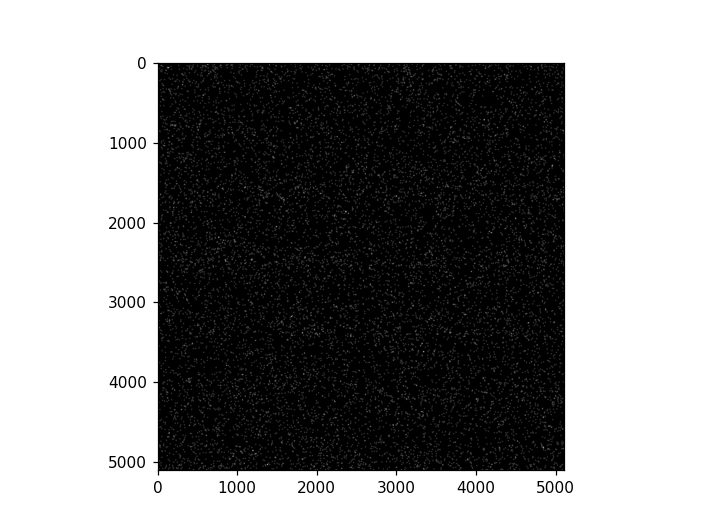

In [55]:
plt.imshow(filtered/np.max(filtered), cmap="gray")

15